In [1]:
import gym
import gym_pdw
                                                    
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class SARSA_LAMBDA:
    
        # Epsilon-greedy action selection
    def select_action(self, epsilon, state, Q):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    # Q function update 
    def update(self, state, action, reward, next_state, next_action, E, Q, alpha):
        error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[action][state[0],state[1]]
        Q = Q + alpha*error*E

        return Q
    
    def sarsa_lambda(self,gamma, alpha, epsilon, episodes, lambda_val):

        # Set the goal variant
        goal_pos = env.set_goal('A')

        # Setting terminal action-state value 
        Terminal_state = goal_pos

        # Initializing Q function values to zero
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])


        steps = np.zeros([episodes])
        rewards = np.zeros([episodes])

        MAX_STEPS = 2000

        for episode in range(episodes):

            env.reset()

            curr_state = env.get_state()
            curr_action = env.random_action()

    #         print(curr_state ,"init====================")

            E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

            for i in range(MAX_STEPS):

                if steps[episode] != 0:
                    action = self.select_action(epsilon, curr_state, Q)

                next_state, reward = env.step(curr_state, curr_action)
                next_action = self.select_action(epsilon, next_state, Q)

                # Update eligibility traces
                E *= gamma*lambda_val
                E[curr_action][curr_state[0],curr_state[1]] += 1
#                 print(E,"=======================================")
                # Update Q values
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, E, Q, alpha)

    #             print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)


                steps[episode] +=1
                rewards[episode] += reward


                curr_state = next_state
                curr_action = next_action
    #             print(curr_state, "curr_state", env.start_positions)

                if curr_state == goal_pos:
                    print("Goal!!!!!!!!!!!!!!!!!!!!!!!", steps[episode])
                    break

        return rewards, steps, Q

In [3]:
def plot_sarsa_lambda(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
#     plt.show()


In [8]:
def plot_compare(rewards_all, steps_all, lambda_vals, episodes):
    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of c
    colors = ['b', 'r', 'g', 'm', 'y','k', 'c']

    # For each value of c, plot the average reward vs steps
    for i in range(25, len(rewards_all)):
        fig1.plot(range(episodes), rewards_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # For each c, plot the % times optimal arm selected vs steps
    for i in range(25, len(steps_all)):
        fig2.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # Labelling the  plot
    fig1.title.set_text('SARSA lambda comparition of Average reward vs episodes for various lambdas')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Labelling the plot
    fig2.title.set_text('SARSA lambda comparition of lambdas Average Steps vs episodes for various lambdas')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()



In [9]:
# To display the policy learn't
def plot_policy(goal_pos, Q):
    plt.rcParams['figure.figsize'] = [8,8]
    fig, ax = plt.subplots()

    ax.matshow(np.argmax(Q_all[0], axis=0))
    for i in range(12):
        for j in range(12):
            if [j,i] == goal_pos:
                    ax.text(i,j,'@', va='center', ha='center')
            else:
                c = int(np.argmax(Q_all[0], axis=0)[j,i])
                direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                ax.text(i, j, direcs[c], va='center', ha='center')

Goal!!!!!!!!!!!!!!!!!!!!!!! 512.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 181.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 173.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 976.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 90.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 59.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 156.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 63.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 65.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 57.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 55.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 97.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 82.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 65.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 75.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 82.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 59.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 52.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 91.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 76.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 95.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 52.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 58.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 84.0
Goal!

Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 63.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 69.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 48.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 101.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 55.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 92.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 50.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 114.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 51.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 57.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 55.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 61.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 57.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 52.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 15.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 15.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 42.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 11.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 48.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 63.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 50.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 53.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 84.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 84.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 65.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 42.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 74.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 119.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 56.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 61.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 60.0
Goal!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 13.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 13.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 78.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 56.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 130.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 65.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 60.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 82.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 282.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 139.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 192.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 63.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 69.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 62.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 62.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 87.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 51.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 53.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 15.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 15.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 62.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 48.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 51.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 52.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 55.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 52.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 42.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 15.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 616.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 208.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 118.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 71.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 104.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 57.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 286.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 122.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 71.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 60.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 72.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 67.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 68.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 59.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 73.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 46.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 55.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 69.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal

Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 63.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 64.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 106.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 13.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 69.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 52.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 48.0
Goal!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 13.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 13.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 67.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 62.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 62.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 47.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 59.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 50.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 48.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 19.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 48.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 11.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 58.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 43.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 44.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 60.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 50.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 28.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 40.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 18.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 30.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 26.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 22.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 23.0
Goal!!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 21.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 39.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 16.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 56.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 35.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 49.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 24.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 54.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 37.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 25.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 34.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 69.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 58.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 126.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 71.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 57.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 55.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 50.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 45.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 36.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 38.0
Goal!!!!!

Goal!!!!!!!!!!!!!!!!!!!!!!! 27.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 14.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 41.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 17.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 33.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 20.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 31.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 29.0
Goal!!!!!!!!!!!!!!!!!!!!!!! 32.0


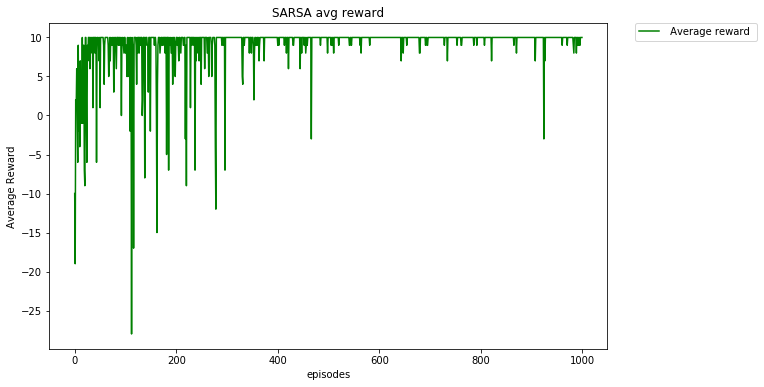

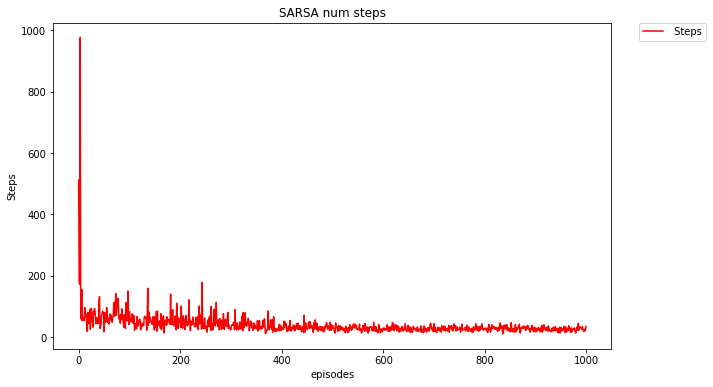

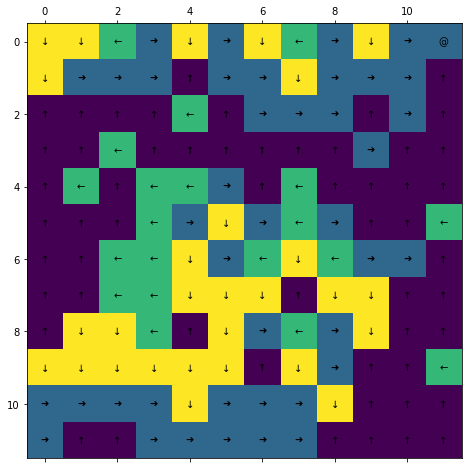

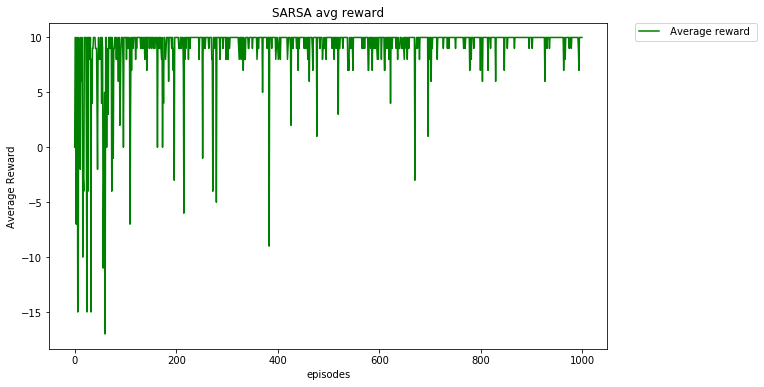

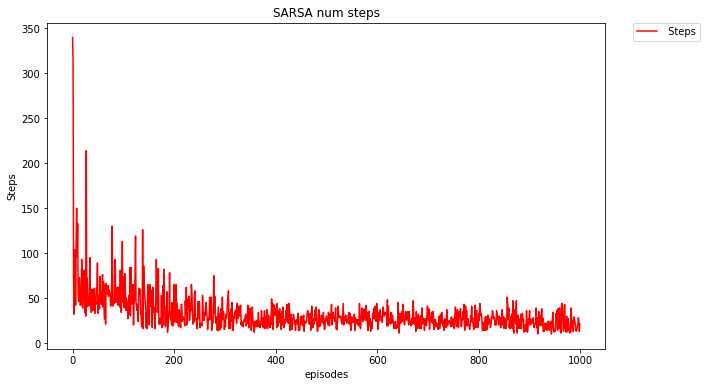

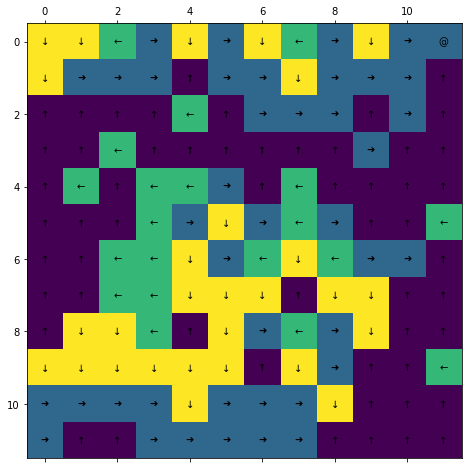

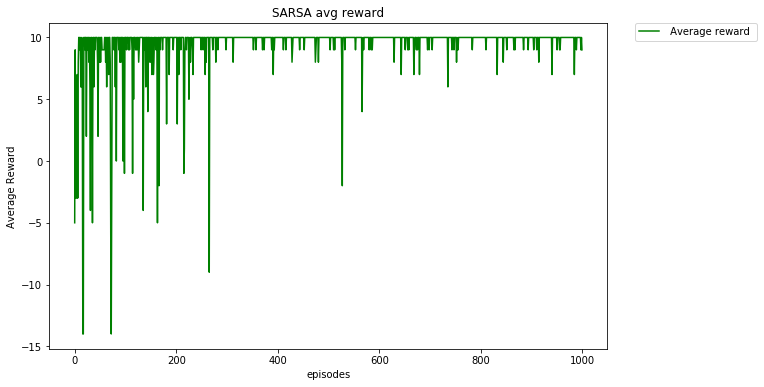

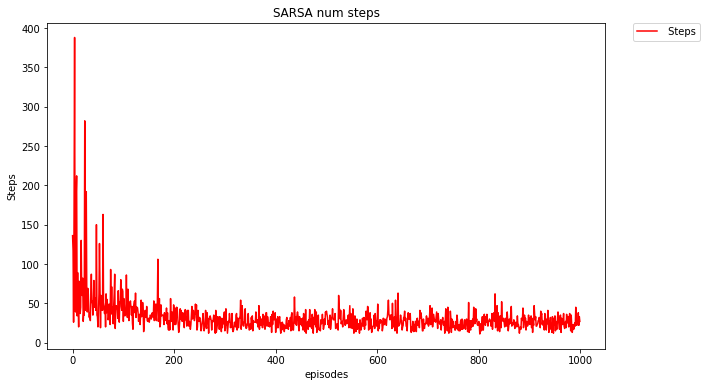

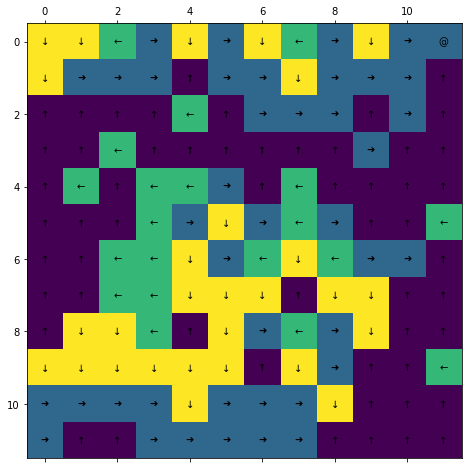

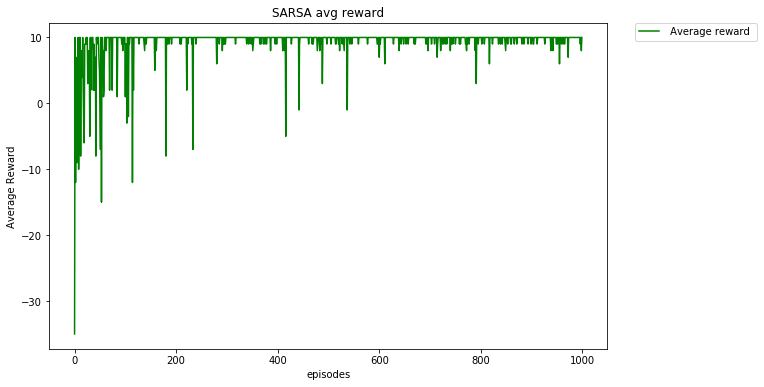

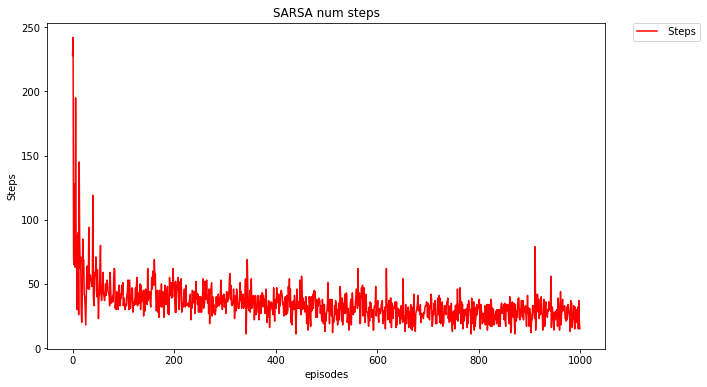

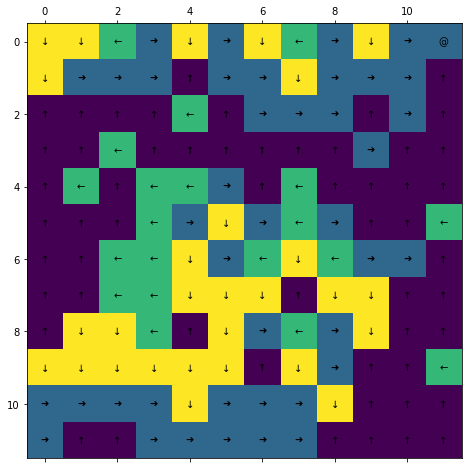

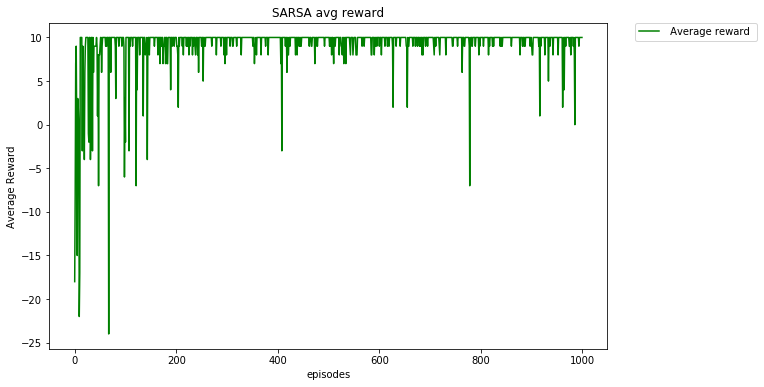

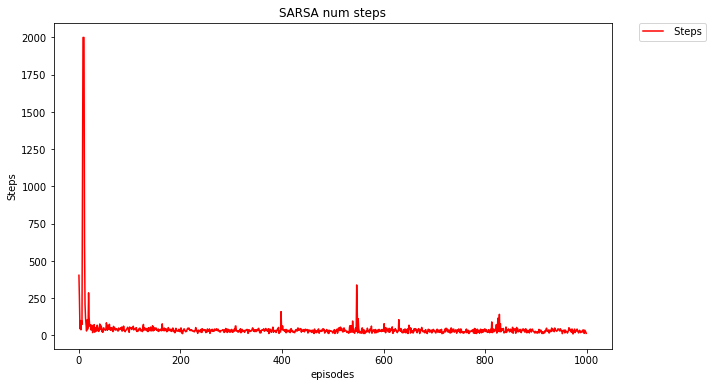

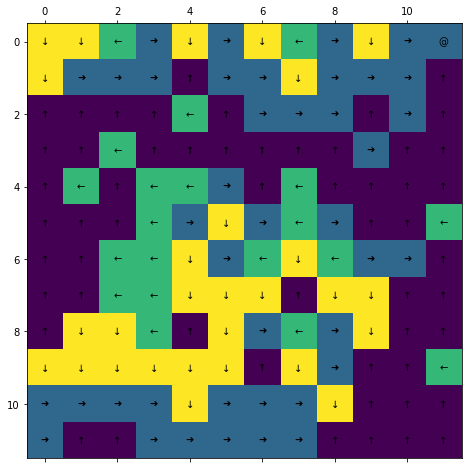

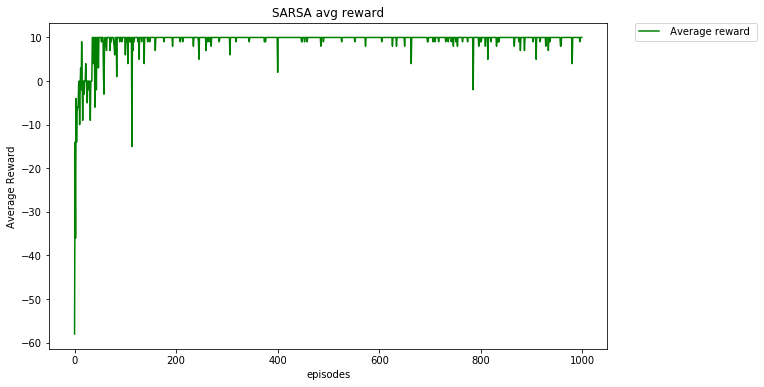

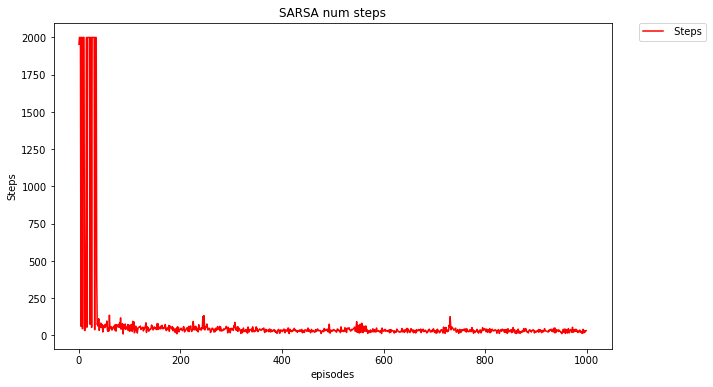

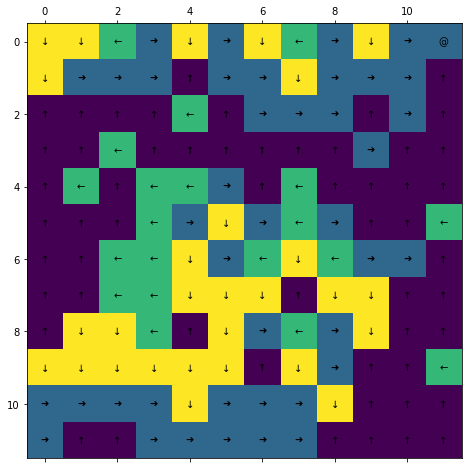

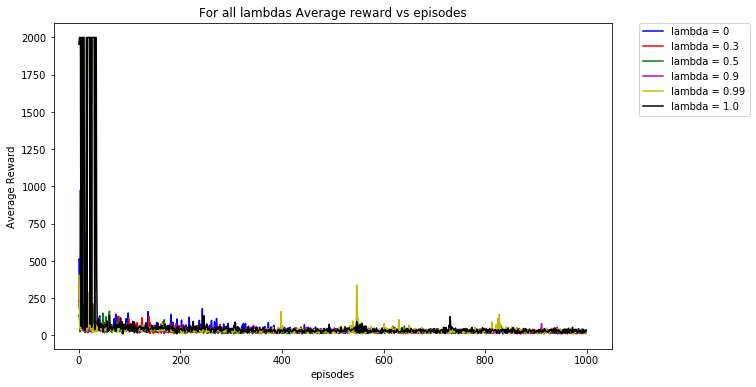

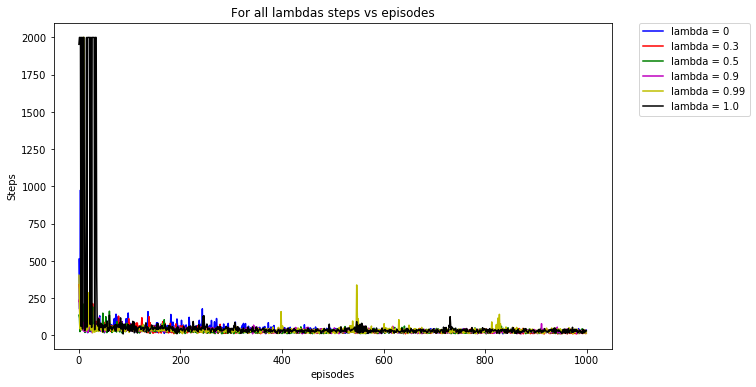

In [10]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
    
    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
#     lambda_vals = [0]
    
    avg_reward_all = []
    steps_all = []
    Q_all = []
    
    env = gym.make('gym_pdw:pdw-v0')
    
    srlbd = SARSA_LAMBDA()
    
    
    for i in range(len(lambda_vals)):
        avg_reward, steps, Q = srlbd.sarsa_lambda(gamma, alpha, epsilon, episodes, lambda_vals[i])
        
        Q_all.append(Q)
        
        avg_reward_all.append(avg_reward)
        steps_all.append(steps)
        
        plot_sarsa_lambda(avg_reward_all[i], steps_all[i], episodes)
        plot_policy([0,11],Q_all[i])
    plt.show
    
    plot_compare(avg_reward_all,steps_all, lambda_vals)
    

0 A


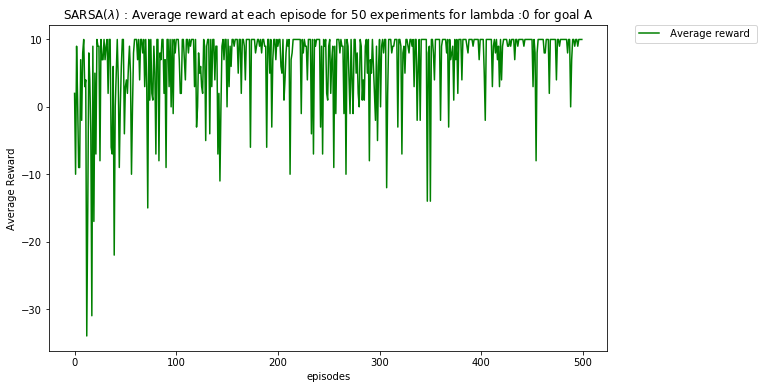

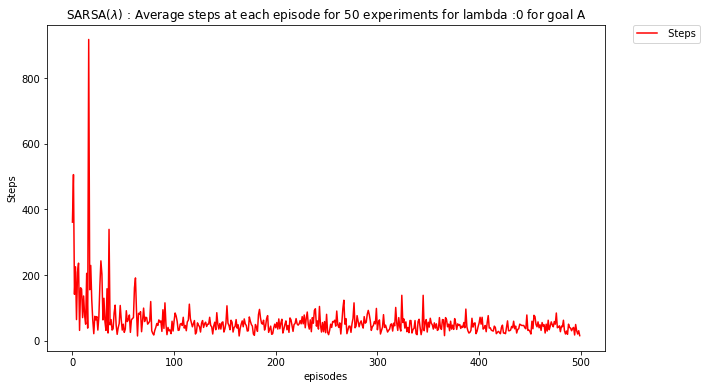

0 B


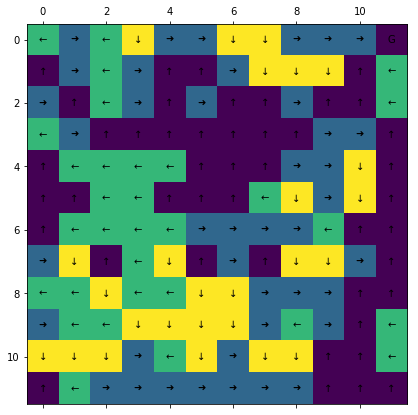

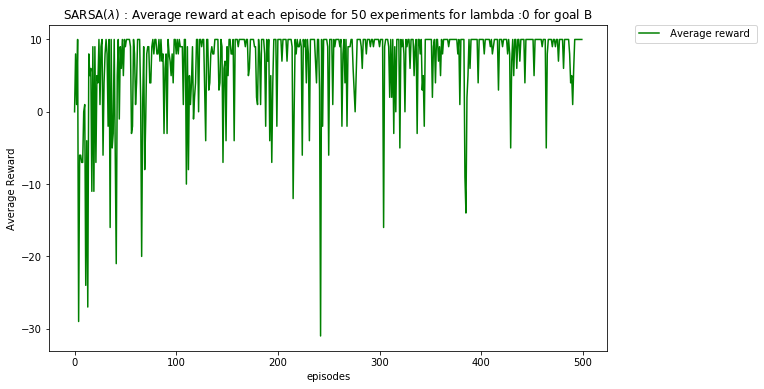

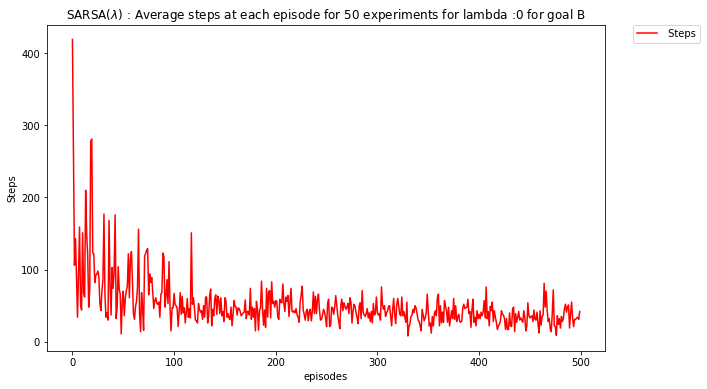

0 C


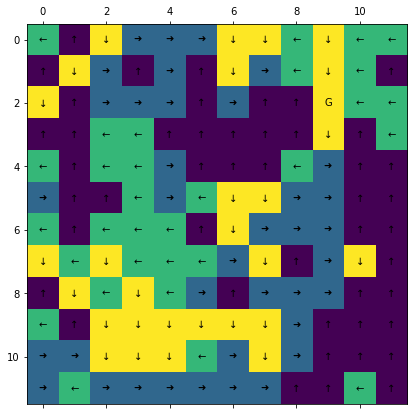

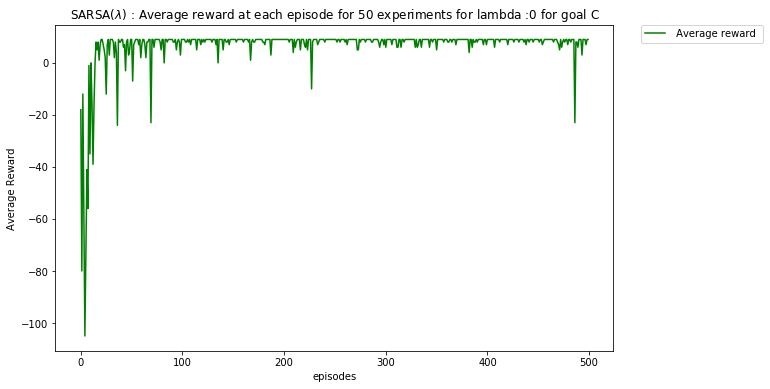

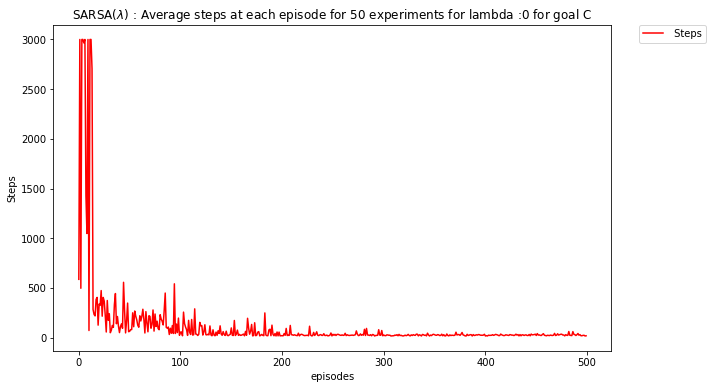

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0]
3
500


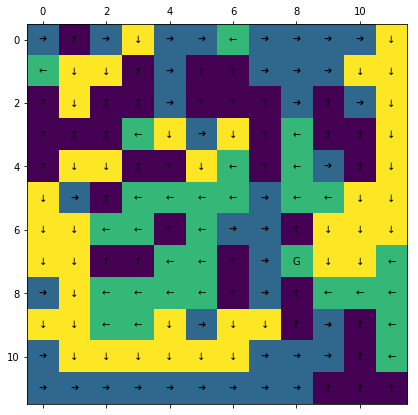

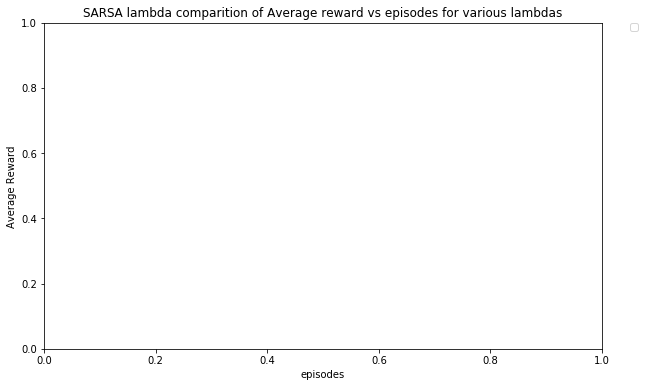

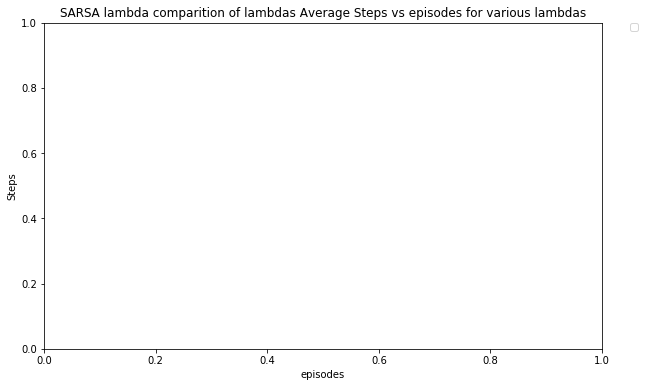

In [19]:
#########################################
############### Problem 2 ############### 
#########################################


import gym
import numpy as np
from matplotlib import pyplot as plt

import multiprocessing as mp

# The puddle world Environment 
import gym_pdw


class SARSA_lambda:
    
    def update(self, curr_state, curr_action, reward, next_state, next_action, E, Q, alpha, gamma):
        '''
        This function takes current state, current action, reward obtained next state, next action,
        current Q, parameters : alpha, gamma.
        Performs SARSA update to update action value function Q  
        '''
        error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[curr_action][curr_state[0],curr_state[1]]
        Q = Q + alpha*error*E
        
        return Q
    
    
    def select_action(self, epsilon, state, Q, env):
        '''
        This function is to select action according to Epsilon-greedy wrt Q value function
        '''
        # The exploration part
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        # The expoition part
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    
    def sarsa_lambda(self, gamma, alpha, epsilon, episodes, lambda_val, env, goal):
        '''
        This function performs :    initialization of environment,
                                    sets goal position,
                                    run episodes, 
                                    perform actions,
                                    changes state,
                                    make Q function updates
        Returns :   rewards - An array of total reward in each episode
                    steps   - An array of total steps taken in each episode
                    Q       - The Final Q (action value) function

        '''

        # Set the goal position
        goal_pos = env.set_goal(goal)

        # Initialize the action value function to the size of 
        # [number of actions , number grid cells in x direction , number grid cells in y direction]
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])


        # Initialize the steps, rewards array to size of number of episodes
        steps = np.zeros([episodes])
        rewards = np.zeros([episodes])

        MAX_STEPS = 3000
        for episode in range(episodes):
            # For each episode

            # Reset the environment, which return the start position
            curr_state = env.reset()
            
            # Select action based on current state and Q function
            curr_action = self.select_action(epsilon, curr_state, Q, env)

            E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])


            # Run untill we reach the goal 
            for i in range(MAX_STEPS):


                # Get the next state and reward based on the current state and action perfomed
                next_state, reward = env.step(curr_state, curr_action)

                # Perform next action based on the above next state, Q function using epsilon greedy method
                next_action = self.select_action(epsilon, next_state, Q, env)

                # Update eligibility traces
                E *= gamma*lambda_val
                E[curr_action][curr_state[0],curr_state[1]] += 1

                # print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)
                
                # Update the Q function based on SARSA update
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, E, Q, alpha, gamma)
                                
                # Set the next state and next action as current state and current action
                curr_state = next_state
                curr_action = next_action
                
                # Increase the steps made in the episode
                steps[episode]+=1
                # Increase the reward obtained in the episode 
                rewards[episode] += reward

                # If we reach the goal, we break the loop i.e, episode ends
                if curr_state == goal_pos:
                    # print("Steps =======================", steps[episode])
                    # print("reward=======================", avg_reward[episode])
                    break

        # print("-----------One exp done-----------")
        return rewards, steps, Q

        
    def plot_sarsa(self, avg_reward, steps, episodes, lambda_, goal):
        '''
        Gets the data for all curves and plots them in one graph
        '''
        # Figure instances will be returned.
        fig1=plt.figure(figsize=(10,6)).add_subplot(111)
        fig2=plt.figure(figsize=(10,6)).add_subplot(111)

        # colors for different values of epsilon
        colors = ['g', 'r', 'k', 'b', 'y','m', 'c']
        fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
        fig2.plot(range(episodes), steps, colors[1], label = " Steps")
        
        # Labelling the plot
        fig1.title.set_text('SARSA'+ '($\lambda$)'+ ' : Average reward at each episode for 50 experiments for lambda :'+ str(lambda_) + ' for goal '+goal)
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('episodes')
        fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        # Labelling the plot
        fig2.title.set_text('SARSA' + '($\lambda$)'+' : Average steps at each episode for 50 experiments for lambda :'+ str(lambda_) + ' for goal '+goal)
        fig2.set_ylabel('Steps')
        fig2.set_xlabel('episodes')
        fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        # Display the plot
        plt.show()

    
    def plot_compare(self, rewards_all, steps_all, lambda_vals, episodes):
    
        # Figure instances will be returned.
        fig1=plt.figure(figsize=(10,6)).add_subplot(111)
        fig2=plt.figure(figsize=(10,6)).add_subplot(111)

        # colors for different values of c
        colors = ['b', 'r', 'g', 'm', 'y','k', 'c']

        # For each value of c, plot the average reward vs steps
        for i in range(25, len(rewards_all)):
            fig1.plot(range(25,episodes), rewards_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )

        # For each c, plot the % times optimal arm selected vs steps
        for i in range(25, len(steps_all)):
            fig2.plot(range(25,episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )

        # Labelling the  plot
        fig1.title.set_text('SARSA lambda comparition of Average reward vs episodes for various lambdas')
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('episodes')
        fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        # Labelling the plot
        fig2.title.set_text('SARSA lambda comparition of lambdas Average Steps vs episodes for various lambdas')
        fig2.set_ylabel('Steps')
        fig2.set_xlabel('episodes')
        fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        # Display the plot
        plt.show()


    # To display the obtained policy
    def plot_policy(self, goal_pos, policy,):
        plt.rcParams['figure.figsize'] = [7,7]
        fig, ax = plt.subplots()
        # Plot the values of a 2D matrix or array as color-coded image.
        ax.matshow(policy)
        for i in range(12):
            for j in range(12):
                if [j,i] == goal_pos:
                    # Show G at the goal of grid  
                    ax.text(i,j,'G', va='center', ha='center')
                else:
                    # Show the direction at each grid cell according to policy
                    c = int(policy[j,i])
                    direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                    ax.text(i, j, direcs[c], va='center', ha='center')



if __name__ == '__main__':
    '''
    Defining the parameters
    '''
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 500

#     lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
    lambda_vals = [0]

    # The goal positions in the environment
    goal_positions = {'A':[0,11],'B':[2,9],'C':[7,8]}
    # A dict to reference goal in a loop
    temp = {0:'A',1:'B',2:'C'}

    com_rew = []
    com_stp = []

    for p in range (len(lambda_vals)):
        for q in range(len(goal_positions)):
            
            goal = temp[q]
            lambda_ = lambda_vals[p]
            
            # Instance of class SARSA
            sr = SARSA_lambda()

            # Number of process to run in parallel here 4  
            pool = mp.Pool(processes = 4)
            # Gets all the outputs into 'data' after all processes are finished, we are running total of 50 experiments
            data = [pool.apply(sr.sarsa_lambda,args=(gamma, alpha, epsilon, episodes, lambda_, gym.make('gym_pdw:pdw-v0'),goal)) for x in range(1)] 

            # Store the average reward at each episode
            avg = np.zeros([episodes])
            # Store the number of steps in each episode
            stp = np.zeros([episodes])


            # To get the average rewards at each episode and average number of steps in each episode
            for i in range(episodes):
                for j in range(len(data)):
                    avg[i] += data[j][0][i]/len(data)
                    stp[i] += data[j][1][i]/len(data)

            # To store final policy obtained for 50 experiments 
            policy = np.zeros([12,12])

            # Used to select most chosen action over all experiments 
            val = {0:0, 1:0, 2:0, 3:0}

            # Selects the most times chosen action over all experiments according to policy in each state
            for i in range(12):
                for j in range(12):
                    for k in range(len(data)):
                        val[np.argmax(data[k][2], axis=0)[i,j]]+=1
                    # Get the most chosen action at the current state
                    max_ = max(val, key=val.get)
                    val = {0:0, 1:0, 2:0, 3:0}
                    policy[i,j] = max_

            com_rew.append(avg)
            com_stp.append(stp)
            

            print(lambda_, goal)

            # Plot for all 
            sr.plot_sarsa(avg, stp, episodes, lambda_, goal)
            sr.plot_policy(goal_positions[temp[q]], policy)
        
    x = np.arange(0,len(com_rew),3, dtype = int)
    print(x)
    rew_val = []
    stp_val = []
    print(len(com_rew))
    print(len(com_rew[0]))
    sr = SARSA_lambda()
    
    for i in range(len(x)):
        rew_val.append(com_rew[x[i]])
        stp_val.append(com_stp[x[i]])
    sr.plot_compare(rew_val, stp_val, lambda_vals, episodes)